# Social Representations and Boundaries of Humor: A focus on Gender roles

## Research questions: 

1) How are men and women depicted in New Yorker cartoons and captions, and do these depictions reflect traditional gender roles or stereotypes?

2) How does audience response (e.g., votes or winning captions) relate to gendered content—do captions about one gender receive more positive attention, and does this reinforce or challenge stereotypes?

## Structure:

### 0. Method to detect gender

Detect gendered references in captions/descriptions and assign a gender to each of them (male, female, both, neutral). 

*Method*: Found two gender lists that contains gendered word. I wanted a longer list so I manually augmented it with universal gendered word and contextual gender markers. Then I added words based on what words are actually on the dataset.

### 1. General distributions

1) Overall presence of gender in captions and image descriptions (barplot)

2) top gendered words -> BOW matrix (histogram)

### 2. How are men/women depicted in the captions

1) Find the top words associated with each gender (wordclouds)

2) Find topic related to man and woman (topic detection)

3) Are men/women seen positively/negatively? (Does it evolve over time?) (sentiment analysis)


### 3. Audience response to gender related captions ?

1. Are captions mentionning gender more funny ? (funnyness score + t-test: $H_0$: There are no difference in funiness between gendered caption and non gendered captions. If refuted: $H_0$: There are no difference in funiness between male gendered caption and female gendered caption. *hope it's refuted*)

2. Does it change over time ?

## Initialisation of the root path

In [1]:
from pathlib import Path
import sys

def warning1(text): print("WARNING!!! ", text)
ACTIVATE_PRINTS = False

# Get correct root path
try:
    root = Path(__file__).resolve().parent
except NameError:
    root = Path.cwd()  # fallback for Jupyter notebooks

while root.parent != root:
    if all((root / marker).exists() for marker in [".git", "README.md", "results.ipynb"]):
        break
    root = root.parent

# Fallback in case nothing found
if not any((root / marker).exists() for marker in [".git", "README.md", "results.ipynb"]):
    print("Could not locate project root — defaulting to current working directory")
    root = Path.cwd()

if ACTIVATE_PRINTS: print(f"Root folder detected at: {root}")

# Ensure importability of the project
if str(root) not in sys.path:
    sys.path.insert(0, str(root))

print(root)

d:\GitHub\ada-2025-project-adacore42


## Imports

In [2]:
# working librairies
import os
import pickle
import csv

sys.path.append(os.path.abspath(".."))

# utils
from src.utils.general_utils import *

# class with functions
from src.models.gender_analysis import GenderAnalysis

# basics
import pandas as pd
import numpy as np

# other
from collections import Counter

# plots
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud

# text processing libraries
import nltk
import spacy
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## Loading the data



In [3]:
ga = GenderAnalysis()

In [4]:
stored_dataprep_pkl_path = r'D:\GitHub\ada-2025-project-adacore42\data\data_prepared.pkl'
data = ga.load_pickle(stored_dataprep_pkl_path)

In [5]:
# Extract the objects in the pickle

# dataA est une liste de DataFrames pandas (ou un objet similaire, comme un dictionnaire de DataFrames). Chaque élément de la liste contient un DataFrame avec 7 colonnes et un nombre variable de lignes.
dataA = data['dataA']
# dataC est un DataFrame de métadonnées de tous les cartoon contests.
dataC = data['dataC']
dataA_startID = data['dataA_startID']
dataA_endID = data['dataA_endID']
dataC_lastGoodID = data['dataC_lastGoodID']

In [6]:
dataA_removed, dataC_removed = drop_NaN(dataA, dataC)

In [7]:
print(f"Length dataA: {len(dataA_removed)}\nShape dataC: {dataC_removed.shape}")

Length dataA: 240
Shape dataC: (240, 9)


## Step 0: Augment the gendered lists

Include male and female names: asked to chatGPT to produce me a list (based on Social Security Administration data)

Include public figures: asked chatGPT for 50 male and female celebrities

The list can be found in gender_analysis.py

## Step 1: Detect gender

Use gender lexicons, but we need to define them first. 

For P2, I used two small lists with common gendered terms. For P3 I want to extend them based on what what terms are used in the contest!

### In the image description

In [9]:
# detect gender in the cartoon descriptions
dataC0 = dataC_removed.copy(deep=True)
dataC1 = ga.get_metadata(dataC0)

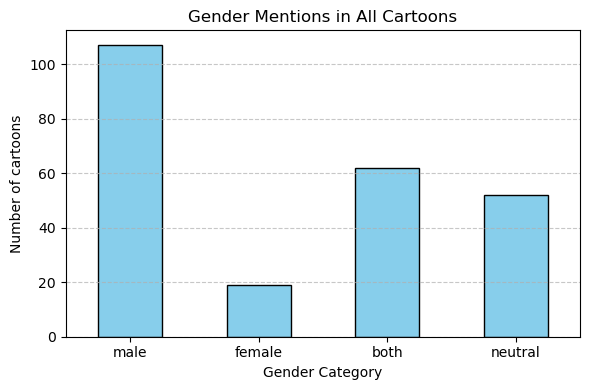

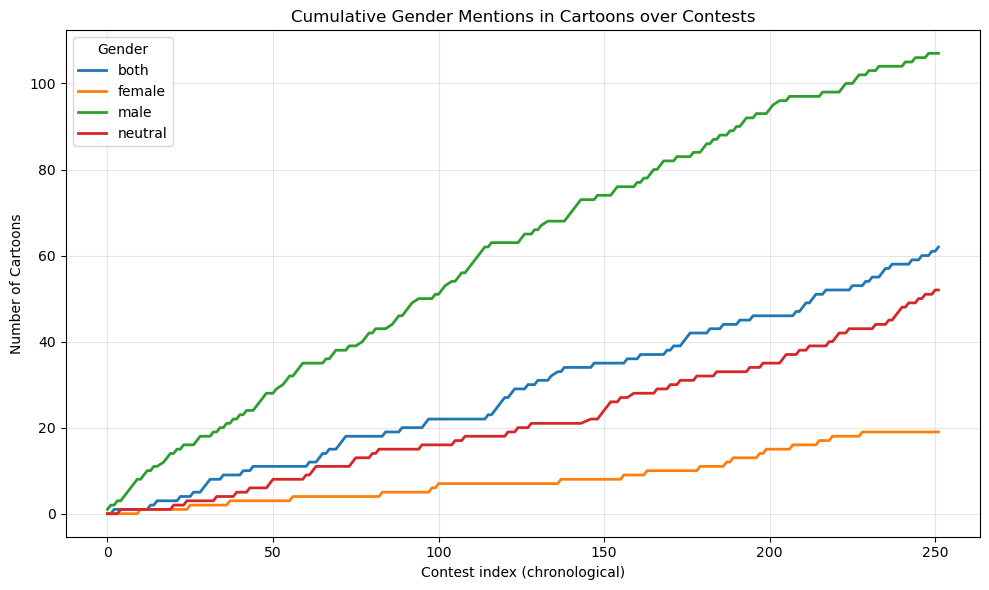

In [10]:
# How often men/women appear in a cartoon ?

# Overall distribution of gender over all the cartoons.
gender_image = dataC1['gender_mention']

# Count frequency
gender_counts = gender_image.value_counts().sort_index()

# Plot Overall counts
ga.plot_overall_counts(
    gender_counts,
    title="Gender Mentions in All Cartoons",
    xlabel="Gender Category",
    ylabel="Number of cartoons"
)

# Evolution over time
df = pd.DataFrame({"contest_index": range(0, len(dataC1)),
                   "gender_mention": dataC1['gender_mention']})

# Count mentions per contest (here each row = one contest)
counts = pd.get_dummies(df["gender_mention"]).cumsum()

# Plot cumulative counts
ga.plot_cumulative_mentions(
    counts,
    title="Cumulative Gender Mentions in Cartoons over Contests",
    xlabel="Contest index (chronological)",
    ylabel="Number of Cartoons",
    legend_title="Gender"
)

### In the captions

In [ ]:
## DON'T RUN THIS AGAIN
# dataTop = ga.get_Top_captions(dataA_removed)

# # Results were saved here: 
# STORED_DATAPREP_PKL_PATH = r'D:\GitHub\ada-2025-project-adacore42\_Other\amelie_analysis\processed_captions.pkl'
# with open(STORED_DATAPREP_PKL_PATH, "wb") as f:
#     pickle.dump(dataTop, f)

In [8]:
STORED_DATACAPTION_PKL_PATH = r'D:\GitHub\ada-2025-project-adacore42\_Other\amelie_analysis\processed_captions.pkl'
data_caption = ga.load_pickle(STORED_DATACAPTION_PKL_PATH)

In [14]:
# # How often men/women are mentionned in captions

# overall_counts, pivoted = ga.distribution_captions(count)

# # In the plots I don't show the neutral, because it is a huge number compared
# # to the other categories

# # Plot Overall counts
# ga.plot_overall_counts(
#     overall_counts,
#     title="Overall Presence of Gender Mentions in the top 10 Captions",
#     xlabel="Gender Category",
#     ylabel="Number of Captions",
#     neutral = False
# )

# # Evolution over time
# cumulative = pivoted.cumsum()

# # Plot cumulative counts
# ga.plot_cumulative_mentions(
#     cumulative,
#     title="Cumulative Gender Mentions in Top 10 Captions per Contest",
#     xlabel="Contest index (chronological)",
#     ylabel="Number of Captions",
#     legend_title="Gender",
#     neutral = False
# )

## Step 2: How are men/women depicted in the captions ? 

### Verbs and adjectives associated with genders

In [ ]:
# men = data_caption[0].groupby('caption').filter(lambda x: x['gender_mention'] == 'male')

In [ ]:
# nlp = spacy.load("en_core_web_sm")

# verbs_male = Counter()
# verbs_female = Counter()
# adjs_male = Counter()
# adjs_female = Counter()

# for contest in data_caption:

#     male_caps   = contest.loc[contest['gender_mention'] == 'male',   'caption'].tolist()
#     female_caps = contest.loc[contest['gender_mention'] == 'female', 'caption'].tolist()

#     # process male captions in batch
#     for doc in nlp.pipe(male_caps):
#         for token in doc:
#             if token.pos_ == "VERB":
#                 verbs_male[token.lemma_] += 1
#             elif token.pos_ == "ADJ":
#                 adjs_male[token.lemma_] += 1

#     # process female captions in batch
#     for doc in nlp.pipe(female_caps):
#         for token in doc:
#             if token.pos_ == "VERB":
#                 verbs_female[token.lemma_.lower()] += 1
#             elif token.pos_ == "ADJ":
#                 adjs_female[token.lemma_.lower()] += 1

In [ ]:
# STORED_FREQS_PKL_PATH = r'D:\GitHub\ada-2025-project-adacore42\_Other\amelie_analysis\freqs_verb_adj.pkl'
# with open(STORED_FREQS_PKL_PATH, "wb") as f:
#     pickle.dump({"verbs_male": verbs_male, "verbs_female": verbs_female, "adjs_male": adjs_male, "adjs_female": adjs_female}, f)

In [ ]:
STORED_FREQS_PKL_PATH = r'D:\GitHub\ada-2025-project-adacore42\_Other\amelie_analysis\freqs_verb_adj.pkl'
data_wordcloud = ga.load_pickle(STORED_FREQS_PKL_PATH)

verbs_male = data_wordcloud['verbs_male']
verbs_female = data_wordcloud['verbs_female']

adjs_male = data_wordcloud['adjs_male']
adjs_female = data_wordcloud['adjs_female']

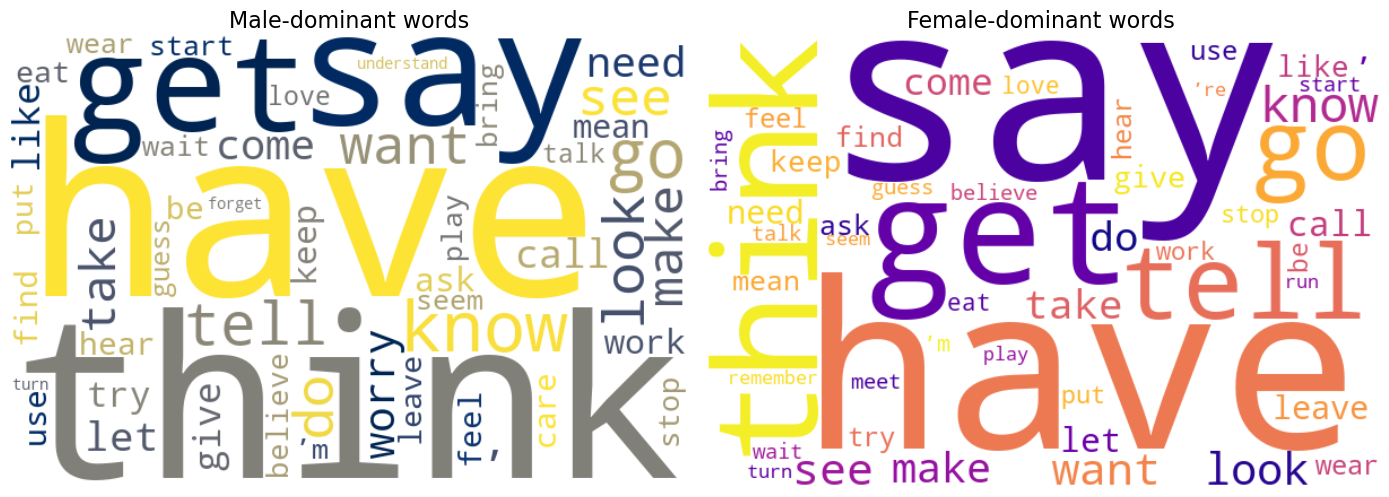

In [10]:
# --- Generate the word clouds ---
male_cloud = WordCloud(
    width=600,
    height=400,
    background_color='white',
    colormap='cividis',
    max_words=50
).generate_from_frequencies(verbs_male)

female_cloud = WordCloud(
    width=600,
    height=400,
    background_color='white',
    colormap='plasma',
    max_words=50
).generate_from_frequencies(verbs_female)

ga.plot_wordclouds(male_cloud, female_cloud)

# size indicates frequency, color is just for esthetics

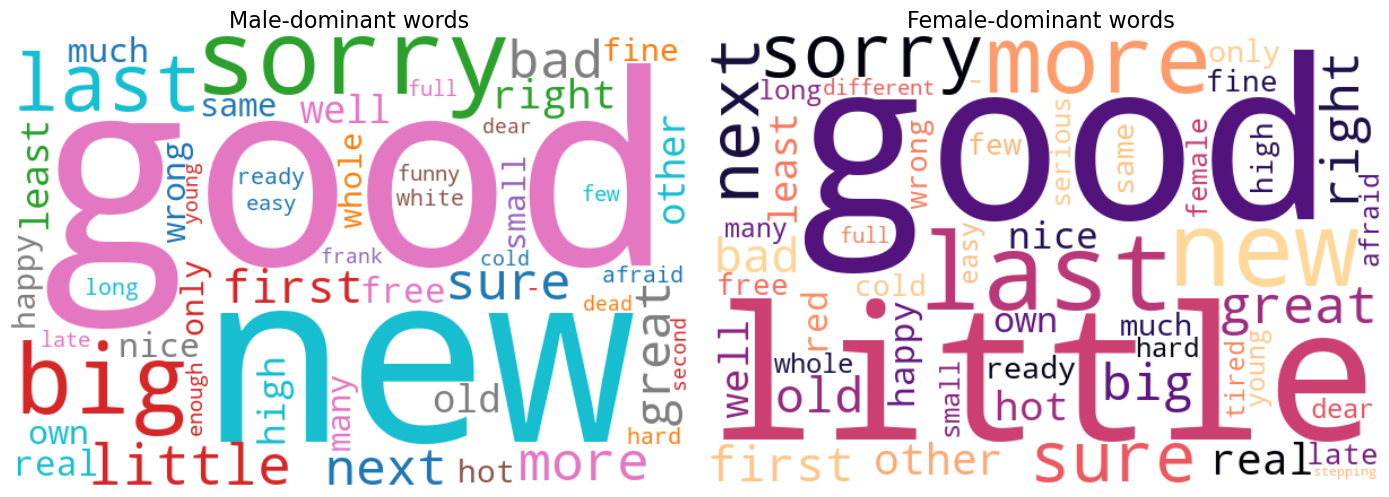

In [12]:
# --- Generate the word clouds ---
male_cloud = WordCloud(
    width=600,
    height=400,
    background_color='white',
    colormap='tab10',
    max_words=50
).generate_from_frequencies(adjs_male)

female_cloud = WordCloud(
    width=600,
    height=400,
    background_color='white',
    colormap='magma',
    max_words=50
).generate_from_frequencies(adjs_female)

ga.plot_wordclouds(male_cloud, female_cloud)

### Topic modelling

https://www.geeksforgeeks.org/nlp/topic-modeling-using-latent-dirichlet-allocation-lda/

Combining topic modeling with sentiment analysis can provide insights into the sentiment associated with specific topics. This is useful in opinion mining and social media analysis.

In [ ]:
# # Creating two dataframes with all the men and women labelled captions

# caption_male_df = data_caption[0].loc[data_caption[0]['gender_mention'] == 'male'].copy(deep=True)
# caption_female_df = data_caption[0].loc[data_caption[0]['gender_mention'] == 'female'].copy(deep=True)

# for idx, contest in enumerate(data_caption[1:]):
#     print(f"Contest: {idx}")
#     male_caps = contest.loc[contest['gender_mention'] == 'male'].copy(deep=True)
#     frames = [caption_male_df, male_caps]
#     caption_male_df = pd.concat(frames)

#     female_caps = contest.loc[contest['gender_mention'] == 'female'].copy(deep=True)
#     frames_ = [caption_female_df, female_caps]
#     caption_female_df = pd.concat(frames_)

# # Save DataFrame to CSV
# caption_female_df.to_csv('all_caption_female.csv', index=False)
# caption_male_df.to_csv('all_caption_male.csv', index=False)

Contest: 0
Contest: 1
Contest: 2
Contest: 3
Contest: 4
Contest: 5
Contest: 6
Contest: 7
Contest: 8
Contest: 9
Contest: 10
Contest: 11
Contest: 12
Contest: 13
Contest: 14
Contest: 15
Contest: 16
Contest: 17
Contest: 18
Contest: 19
Contest: 20
Contest: 21
Contest: 22
Contest: 23
Contest: 24
Contest: 25
Contest: 26
Contest: 27
Contest: 28
Contest: 29
Contest: 30
Contest: 31
Contest: 32
Contest: 33
Contest: 34
Contest: 35
Contest: 36
Contest: 37
Contest: 38
Contest: 39
Contest: 40
Contest: 41
Contest: 42
Contest: 43
Contest: 44
Contest: 45
Contest: 46
Contest: 47
Contest: 48
Contest: 49
Contest: 50
Contest: 51
Contest: 52
Contest: 53
Contest: 54
Contest: 55
Contest: 56
Contest: 57
Contest: 58
Contest: 59
Contest: 60
Contest: 61
Contest: 62
Contest: 63
Contest: 64
Contest: 65
Contest: 66
Contest: 67
Contest: 68
Contest: 69
Contest: 70
Contest: 71
Contest: 72
Contest: 73
Contest: 74
Contest: 75
Contest: 76
Contest: 77
Contest: 78
Contest: 79
Contest: 80
Contest: 81
Contest: 82
Contest: 83
Co

In [ ]:
## TOPIC MODELLING: FINDING TOPICS WITH BERT AND LABELING EACH CAPTIONS WITH A TOPIC, THEN SAVING RESULTS

from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# -------------------------------------
# 1. Load captions
# -------------------------------------
data_m = pd.read_csv('all_caption_male.csv')
captions = data_m['caption'].tolist()
captions

# # -------------------------------------
# # 2. Load sentence embedding model
# # -------------------------------------
# # Better than default: tuned for short sentences
# embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# # Compute caption embeddings
# embeddings = embedding_model.encode(captions, show_progress_bar=True)

# # -------------------------------------
# # 3. Create BERTopic model
# # -------------------------------------
# topic_model = BERTopic(
#     embedding_model=embedding_model,
#     min_topic_size=25,          # tune this (smaller → more topics)
#     n_gram_range=(1, 2),        # allow bigrams (important for humor)
#     verbose=True
# )

# # Fit model using embeddings
# topics, probs = topic_model.fit_transform(captions, embeddings)

["i'm a congressman--obstruction is my job.",
 "i'm doing a study on the indifference of man. so far you're all doing great!",
 "i'm waiting for the chalk guy.",
 'you probably know my column: man on the street.',
 "it's the only place that i don't get stepped on.",
 'brother, can you spare a pillow?',
 "if it weren't for the brooks brothers suit you'd call me homeless.",
 'i\'m testing the ted cruz theory of "new york values".',
 'sir, your zipper is open.',
 "bravo! you're all passing the apathy test with flying colors--except for the dog. he looked back in concern.",
 "if you are in a hurry, don't walk past the philosophy school.",
 "i'll show you man-spreading!",
 'man... place sure has changed since i was a kid.',
 "and that's one giant step for a kind man!",
 'seems like no one wants to interview the man in the street anymore.',
 "my editor wants a 'man on the street' piece.",
 'and when he grew up, flat stanley took an entry-level position on wall street.',
 'performance artist 

In [ ]:
# -------------------------------------
# 4. Inspect topics
# -------------------------------------
topic_model.get_topic_info().head()

# Example: show the top 10 words for topic 3
# print(topic_model.get_topic(-1))

Topic  Count                                  Name  \
0     -1  19352                 -1_she_her_mother_mom   
1      0   1323           0_wife_my wife_your wife_ex   
2      1   1140    1_queen_the queen_my queen_majesty   
3      2   1012  2_summer_the summer_this summer_fall   
4      3    811            3_women_woman_female_girls   

                                      Representation  \
0  [she, her, mother, mom, to, and, you, the, my,...   
1  [wife, my wife, your wife, ex, ex wife, my, wi...   
2  [queen, the queen, my queen, majesty, queen is...   
3  [summer, the summer, this summer, fall, great ...   
4  [women, woman, female, girls, women women, the...   

                                 Representative_Docs  
0  [what do you think mom is trying to say?, you'...  
1  [and for my ex-wife?, i think that's my ex-wif...  
2  [be my queen., the queen is dead. long live th...  
3  [i had a great fall, but the spring and summer...  
4  [it's a good way to meet women., feminism: mad...

In [ ]:
# # -------------------------------------
# # 5. Visualizations (optional, and it's not great)
# # -------------------------------------
# topic_model.visualize_topics()
# topic_model.visualize_barchart()
# topic_model.visualize_documents(captions, topics)

In [ ]:
# -------------------------------------
# 6. Save results 
# -------------------------------------
df_topics = pd.DataFrame({
    "caption": captions,
    "topic": topics,
})

df_topic_info_male = topic_model.get_topic_info()

df_topics.to_csv("caption_labeled_topics_male.csv", index=False)
df_topic_info_male.to_csv("info_topics_male.csv", index=False)

#### LDA Model

In [ ]:
## LDA Model -> UNSTABLE    

import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
import re

# Download NLTK stopwords
# nltk.download('stopwords')
stop_words = stopwords.words('english')

# Load data
data = pd.read_csv('all_caption_female.csv')

# Preprocess the text data
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\S*@\S*\s?', '', text)  # Remove emails
    text = re.sub('\'', '', text)  # Remove apostrophes
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabet characters
    text = text.lower()  # Convert to lowercase
    return text

# Tokenize and remove stopwords
def tokenize(text):
    tokens = gensim.utils.simple_preprocess(text, deacc=True)
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

def lemmatize(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

data['cleaned_text'] = data['caption'].apply(preprocess_text) 
data['tokens'] = data['cleaned_text'].apply(tokenize)

# Lemmatization using spaCy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
data['lemmas'] = data['tokens'].apply(lemmatize)

# Create dictionary and corpus
id2word = corpora.Dictionary(data['lemmas'])
texts = data['lemmas']
corpus = [id2word.doc2bow(text) for text in texts]

Number of topics: 6.0
Number of topics: 7.0
Number of topics: 8.0
Number of topics: 9.0
Number of topics: 10.0
Number of topics: 11.0
Number of topics: 12.0
Number of topics: 13.0
Number of topics: 14.0
Number of topics: 15.0
Number of topics: 16.0
Number of topics: 17.0
Number of topics: 18.0
Number of topics: 19.0
Number of topics: 20.0


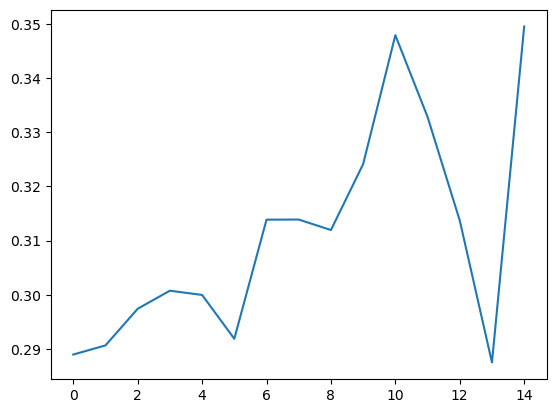

In [26]:
num_topics_list = np.linspace(6, 20, 15)

coherence_score = []

for i in num_topics_list:
    print(f"Number of topics: {i}")
    # Build LDA model, NUMBER OF TOPICS: pick the one that has the highest coherence score.
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=i, 
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)

    # Print the topics
    # topics = lda_model.print_topics(num_words=5)
    # for topic in topics:
    #     print(topic)

    # Compute coherence score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data['lemmas'], dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_score.append(coherence_lda)

plt.plot(coherence_score)

### Sentiment Analysis

In [ ]:
analyzer = SentimentIntensityAnalyzer()

### NEXT

## Other codes

In [23]:
male_terms = [
            'guy', 'spokesman', 'chairman', "men's", 'men', 'him', "he's", 'his', 'boy',
            'boyfriend', 'boyfriends', 'boys', 'brother', 'brothers', 'dad', 'dads',
            'dude', 'father', 'fathers', 'fiance', 'gentleman', 'gentlemen', 'god',
            'grandfather', 'grandpa', 'grandson', 'groom', 'he', 'himself', 'husband',
            'husbands', 'king', 'male', 'man', 'mr', 'nephew', 'nephews', 'priest',
            'prince', 'son', 'sons', 'uncle', 'uncles', 'waiter', 'widower', 'widowers',
            'congressman',

            # --- Added universal & contextual male terms ---
            'bloke', 'chap', 'fella', 'gent', 'sir', 'lad', 'lads',
            'manliness', 'masculine', 'boyhood',
            'father-in-law', 'stepfather', 'stepson',
            'godfather', 'old man',
            'bachelor', 'groomsman',
            'kings',
            'monk', 'wizard',
            'policeman', 'fireman', 'salesman', 'businessman', 'workman',

            # --- Public figures ---
            "bush", "sanders",
            "einstein", "hitchcock", "bansky", "kanye", "obama","biden","trump","putin","zelenskyy",
            "macron","schwarzenegger","clooney","hanks","dicaprio",
            "pitt","depp","cruise","stallone","eastwood","gosling","carey","seinfeld","rock","chappelle",
            "sandler","springsteen","dylan","cobain","mars","drake","sheeran","mccartney","lennon",
            "jagger","bale","damon","affleck","reynolds","washington","freeman","jackson","smith","murphy",
            "reeves","keaton","downey","ruffalo","leno","colbert","stewart","oppenheimer","gates","musk"


            # --- 200 Most Popular American male names ---
            "james","robert","john","michael","david","william","richard","joseph","thomas","charles",
            "christopher","daniel","matthew","anthony","mark","donald","steven","paul","andrew","joshua",
            "kenneth","kevin","brian","george","edward","ronald","timothy","jason","jeffrey","ryan",
            "jacob","gary","nicholas","eric","jonathan","stephen","larry","justin","scott","brandon",
            "benjamin","samuel","gregory","alexander","frank","patrick","raymond","jack","dennis","jerry",
            "tyler","aaron","jose","adam","nathan","henry","douglas","zachary","peter","kyle",
            "walter","ethan","jeremy","harold","keith","christian","roger","noah","gerald","carl",
            "terry","sean","austin","arthur","lawrence","jesse","dylan","bryan","joe","jordan",
            "billy","bruce","albert","willie","gabriel","logan","alan","juan","wayne","roy",
            "ralph","randy","eugene","vincent","bobby","russell","louis","philip","johnny","riley",
            "victor","mason","dale","brett","caleb","curtis","phillip","nathaniel","rodney","cody",
            "joel","craig","tony","evan","shawn","wesley","alex","travis","chad","derrick",
            "stanley","leonard","connor","oscar","xavier","miguel","edwin","martin","emmanuel","jay",
            "clifford","herman","seth","edgar","mario","frederick","allen","tyrone","max","aiden",
            "colton","hector","jon","spencer","rick","clarence","malik","leo","dustin","maurice",
            "dominic","hayden","troy","gordon","marshall","abel","andre","lawson","reed","ramon",
            "lance","casey","terrence","francis","trevor","jared","marco","darren","eli","ben",
            "rafael","don","diego","romeo","ruben","clayton","carlos","kirk","brayden","ronnie",
            "felix","jimmy","asher","camden","harvey","brendan","tristan","dean","parker","francisco",
            "ivan","milo","ted"
        ]

In [21]:
dataA[0]['caption'][3901]

"This has 'Alice in Wonderland' beat by a mile."

In [15]:
# load nlp from spacy
nlp = spacy.load("en_core_web_sm")

In [20]:
example = data_caption[0]['caption'].values[0]
example

"i'm a congressman--obstruction is my job."

In [21]:
example = data_caption[0]['caption'].values[0]
doc = nlp(example)

In [24]:
tokens = [token.text for token in doc]
print(tokens)

['This', 'has', "'", 'Alice', 'in', 'Wonderland', "'", 'beat', 'by', 'a', 'mile', '.']


In [25]:
pos_tagged = [(token.text, token.pos_) for token in doc]
print(pos_tagged)

[('This', 'PRON'), ('has', 'VERB'), ("'", 'PUNCT'), ('Alice', 'PROPN'), ('in', 'ADP'), ('Wonderland', 'PROPN'), ("'", 'PUNCT'), ('beat', 'NOUN'), ('by', 'ADP'), ('a', 'DET'), ('mile', 'NOUN'), ('.', 'PUNCT')]


In [26]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Alice PERSON
Wonderland GPE
a mile QUANTITY


In [ ]:
def extract_nouns(dataA):
    nlp = spacy.load("en_core_web_sm")
    nouns = Counter()

    for idx in range(len(dataA)):
        captions = dataA[idx].caption

    for text in captions:
        doc = nlp(text)
        for token in doc:
            if token.pos_ in ["NOUN"]:  # common + proper nouns
                nouns[token.lemma_] += 1
    return nouns

def extract_proper_nouns(dataA):

    nlp = spacy.load("en_core_web_sm")
    proper_nouns = Counter()

    for idx in range(len(dataA)):
        captions = dataA[idx].caption

        for text in captions:
            doc = nlp(text)
            for ent in doc.ents:
                if ent.label_ == 'PERSON':
                    proper_nouns[ent.text] += 1

    return proper_nouns

In [61]:
# load nlp from spacy
nlp = spacy.load("en_core_web_sm")

verbs_male = []
verbs_female = []
adjs_male = []
adjs_female = []

# Create two separated document: one with all the male and the other with all of the female captions
for contest in data_caption:
    # initialize lists that keep track of type of words
    verb_male = []
    verb_female = []
    adj_male = []
    adj_female = []


    # find in each caption that are labeled as male the verb and ajdectives
    male_captions = contest[contest['gender_mention'] == 'male'].caption.values
    for caption in male_captions:
        doc = nlp(caption)
        for token in doc:
            if token.pos_ == 'VERB':
                verb_male.append(token.text)
            elif token.pos_ == 'ADJ':
                adj_male.append(token.text)


    # find in each caption that are labeled as female the verb and ajdectives
    female_captions = contest[contest['gender_mention'] == 'female'].caption.values
    for caption in female_captions:
        doc = nlp(caption)
        for token in doc:
            if token.pos_ == 'VERB':
                verb_female.append(token.text)
            elif token.pos_ == 'ADJ':
                adj_female.append(token.text)

    
    verbs_male.append(verb_male)
    verbs_female.append(verb_female)
    adjs_male.append(adj_male)
    adjs_female.append(adj_female)
    break